# Siemens Logistic - Data Exploration - Tracking Status

This google colab instance was written with the goal to establish a versitile and light-weight model for the prediction of delivery date of shipements.

# Data Import & Preperation

## Data Import

In [1]:
"load and parse the raw data"

# Imports
# Create_Flat_Tracking
import pandas as pd
import numpy as np
import os
import json
import glob
from tqdm import tqdm_notebook

def replace_name(column_name):
    start_index = column_name.find("_source.")
    if start_index != -1:
        return column_name[len("_source")+1:]
    else:
        return column_name

# # Mount my Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# Temp Dataframe
df_tracking = pd.DataFrame()

# Read JSON in Folder
# TODO: Make a better parrallel implementation
print("\n# Importing files from Google drive")
path_to_read = '../../Data/tracking_status/*'
file_list = glob.glob(path_to_read)
for file in tqdm_notebook(file_list,desc="Importing Source File"):  
  _file = open(file, encoding='utf8')
  data = json.load(_file)
  df_tracking = df_tracking.append(pd.json_normalize(data), ignore_index = True)

df_tracking.head()



# Importing files from Google drive


<ipython-input-1-32ca641091a2>:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file in tqdm_notebook(file_list,desc="Importing Source File"):


Importing Source File:   0%|          | 0/4 [00:00<?, ?it/s]

,_index,_type,_id,_score,_source.LOCATION,_source.reason_DE,_source.END_DATE,_source.START_DATE,_source.STATUS_DATE,_source.status_EN,_source.EXPLANATION,_source.SYSTEM_DATE,_source.OBJECT_ID,_source.status_DE,_source.SHIPMENTID,_source.TS_ID,_source.reason_EN
0,s5740_heppner_trackingstatuses,_doc,-2104623439,1.0,EDI,Ablieferbeleg (POD) archiviert (FR),18-02-2020 05:00:00,11-02-2020 05:00:00,2020-02-12 23:59:00.0,archived,,2020-02-13 06:23:38.0,-2104623439,Archiviert,339862787,2659568405,POD archived
1,s5740_heppner_trackingstatuses,_doc,-955262310,1.0,EDI,Reine Quittung,18-02-2020 05:00:00,11-02-2020 05:00:00,2020-02-12 19:47:00.0,Delivered,,2020-02-12 20:26:05.0,-955262310,Zugestellt,339862809,2658791123,clean P.O.D.
2,s5740_heppner_trackingstatuses,_doc,-446600097,1.0,EDI,Sendung auf dem Weg zum Empfänger/in Zustellung,18-02-2020 05:00:00,11-02-2020 05:00:00,2020-02-11 15:47:00.0,delivery,,2020-02-12 16:23:18.0,-446600097,Zustellung,339880891,2658330457,En route to consignee
3,s5740_heppner_trackingstatuses,_doc,869582655,1.0,EDI,Eingang Empfangspartner,18-02-2020 05:00:00,11-02-2020 05:00:00,2020-02-11 10:20:00.0,discharge,LA CHAPELLE ST AUBIN,2020-02-11 16:59:45.0,869582655,Entladung,339894635,2655950885,Inbound Receiving Partner
4,s5740_heppner_trackingstatuses,_doc,1497967295,1.0,EDI,Eingang Empfangspartner,18-02-2020 05:00:00,11-02-2020 05:00:00,2020-02-11 06:08:00.0,discharge,GONESSE,2020-02-11 09:23:30.0,1497967295,Entladung,339894636,2655150526,Inbound Receiving Partner


## Format Data & Columns

In [2]:
# Rename and format columns
# Rename column
df_tracking = df_tracking.rename(columns={c: replace_name(c.strip()) for c in df_tracking.columns})
df_tracking = df_tracking.drop(df_tracking.columns[df_tracking.columns.str.startswith('_')], axis=1)
#Apply datatype
df_tracking[[c for c in df_tracking.columns if not c.endswith('_DATE')]] = \
    df_tracking[[c for c in df_tracking.columns if not c.endswith('_DATE')]].astype(pd.StringDtype())
df_tracking[[c for c in df_tracking.columns if c.endswith('_DATE')]] = \
    df_tracking[[c for c in df_tracking.columns if  c.endswith('_DATE')]].apply(pd.to_datetime)
df_tracking.head()

# Groups and remove duplicates
# Remove duplicate
df_tracking_no_duplicate =   df_tracking.drop_duplicates(['SHIPMENTID', 'reason_DE', 'status_DE'])
# Filter uniques and groups
uniques = df_tracking_no_duplicate['reason_DE'].unique()
df_tracking_no_duplicate_sorted = df_tracking_no_duplicate.sort_values(['STATUS_DATE'])
df_tracking_no_duplicate_sorted

,LOCATION,reason_DE,END_DATE,START_DATE,STATUS_DATE,status_EN,EXPLANATION,SYSTEM_DATE,OBJECT_ID,status_DE,SHIPMENTID,TS_ID,reason_EN
478240,EDI,Sendung auf dem Weg zum Empfänger/in Zustellung,2019-08-01 05:00:00,2019-01-01 05:00:00,2019-01-02 00:00:00,delivery,,2019-01-02 11:23:10,533190740,Zustellung,297586898,2006288578,En route to consignee
937691,EDI,Eingang Versandpartner,2019-08-01 05:00:00,2019-01-01 05:00:00,2019-01-02 15:45:00,discharge,NEU-ULM 5082,2019-01-02 16:23:13,1635777866,Entladung,297975316,2006558392,Inbound Sending Partner
478202,EDI,Reine Quittung,2019-08-01 05:00:00,2019-01-01 05:00:00,2019-01-02 23:58:00,Delivered,,2019-01-03 06:23:13,461433342,Zugestellt,297586898,2007443459,clean P.O.D.
937730,EDI,Sendung auf dem Weg zum Empfänger/in Zustellung,2019-08-01 05:00:00,2019-01-01 05:00:00,2019-01-03 00:00:00,delivery,,2019-01-03 13:53:18,-542459960,Zustellung,297166330,2008041575,En route to consignee
19005,EDI,Zustellung nicht belegbar/Wechselbrückengestel...,2019-08-01 05:00:00,2019-01-01 05:00:00,2019-01-03 10:06:00,Delivered,,2019-01-03 10:23:30,-221888158,Zugestellt,295476310,2007762918,delivery without POD / swap body deposit
...,...,...,...,...,...,...,...,...,...,...,...,...,...
446034,EDI,Eingang Empfangspartner,2020-10-28 05:00:00,2020-10-27 05:00:00,2020-10-27 20:45:00,discharge,STRASBOURG,2020-10-27 20:59:21,-1206312498,Entladung,370365073,3113609047,Inbound Receiving Partner
446033,EDI,Eingang Empfangspartner,2020-10-28 05:00:00,2020-10-27 05:00:00,2020-10-27 20:45:00,discharge,STRASBOURG,2020-10-27 20:59:22,-772991917,Entladung,370408405,3113609060,Inbound Receiving Partner
446032,EDI,Eingang Empfangspartner,2020-10-28 05:00:00,2020-10-27 05:00:00,2020-10-27 20:45:00,discharge,STRASBOURG,2020-10-27 20:59:23,339354950,Entladung,370417687,3113609107,Inbound Receiving Partner
920007,EDI,Eingang Empfangspartner,2020-10-28 05:00:00,2020-10-27 05:00:00,2020-10-27 20:45:00,discharge,STRASBOURG,2020-10-27 20:59:22,-1966302474,Entladung,370408561,3113609088,Inbound Receiving Partner


## Map to Milestones

In [3]:
# Compute milesstones
# Milesstines to Events mapping 
# TODO: Incomplete
milestone_to_event = {
    300:{
        "name": "Abholung",
        "event_list": ['Sendung abgeholt / Eingang Lager VP', 
                     'Abholung geplant am', 
                     'Sendung an Drittpartner verladen',
                     'Sendung abgeholt',
                     'Sendung verladen', 
                     'Sdg. noch nicht versandfertig',
                     'Kunde wünscht Terminabstimmung', 
                     'niemand angetroffen', 
                     'Sdg. nicht erhalten', 
                     'Zusatztext']
    },
    400:{
        "name": "Ankunft in Abholterminal",
         "event_list": ['Eingang Empfangspartner']
    },
    410:{
        "name": "Abfahrt von Abholterminal",
         "event_list": ['Verladen an', 
                     'Verladen in Produktionsgebiet an',
                     'Verladung an/durch Fremdspediteur']
    },
    490:{
        "name": "Ankunft Zustellterminal",
         "event_list": ['Eingang Versandpartner']
    },
}
# Event-to-milestones Mapping
event_to_milestones = {
          'Sendung abgeholt / Eingang Lager VP':{
              "milestone_name": "Abholung",
              "milestone_value": 300,
          },
                     'Abholung geplant am':{
              "milestone_name": "Abholung",
              "milestone_value": 300,
          },
                     'Sendung an Drittpartner verladen':{
              "milestone_name": "Abholung",
              "milestone_value": 300,
          },
                     'Sendung abgeholt':{
              "milestone_name": "Abholung",
              "milestone_value": 300,
          },
                     'Sendung verladen':{
              "milestone_name": "Abholung",
              "milestone_value": 300,
          },
                     'Eingang Empfangspartner':{
              "milestone_name": "Ankunft in Abholterminal",
              "milestone_value": 400,
          },
                     'Verladen an':{
              "milestone_name": "Abfahrt von Abholterminal",
              "milestone_value": 410,
          },
                     'Verladen in Produktionsgebiet an':{
              "milestone_name": "Abfahrt von Abholterminal",
              "milestone_value": 410,
          },
                     'Verladung an/durch Fremdspediteur':{
              "milestone_name": "Abfahrt von Abholterminal",
              "milestone_value": 410,
          },
                     'Eingang Versandpartner':{
              "milestone_name": "Ankunft Zustellterminal",
              "milestone_value": 490,
          },
                     'Sendung auf dem Weg zum Empfänger/in Zustellung':{
              "milestone_name": "In Zustellung",
              "milestone_value": 500,
          },
                     'Sendung für Zustellung vorgesehen/Nachladesendung':{
              "milestone_name": "In Zustellung",
              "milestone_value": 500,
          },
                     'Reine Quittung':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          },
                     'Zustellung nicht belegbar/Wechselbrückengestellung':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          },
                     'mit Beschädigung':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          },
                     'mit Teilfehlmenge':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          },
                     'Teil-Annahmeverweigert':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          },
                     'Ablieferbeleg (POD) archiviert (FR)':{
              "milestone_name": "Archiviert",
              "milestone_value": 650,
          },
                     'Ablieferbeleg (POD) archiviert (DE)':{
              "milestone_name": "Archiviert",
              "milestone_value": 650,
          },
                     'Zustellbeleg (POD) archiviert':{
              "milestone_name": "Archiviert",
              "milestone_value": 650,
          },
                     'Digitalfoto archiviert':{
              "milestone_name": "Archiviert",
              "milestone_value": 650,
          },
                     'Sdg. noch nicht versandfertig':{
              "milestone_name": "Abholung",
              "milestone_value": 300,
          },
                     'Kunde wünscht Terminabstimmung':{
              "milestone_name": "Abholung",
              "milestone_value": 300,
          },
                     'niemand angetroffen':{
              "milestone_name": "Abholung",
              "milestone_value": 300,
          },
                     'Sdg. nicht erhalten':{
              "milestone_name": "Abholung",
              "milestone_value": 300,
          },
                     'Zusatztext':{
              "milestone_name": "Abholung",
              "milestone_value": 300,
          },
                     'keine Warenannahme oder Vereinbarung':{
              "milestone_name": "In Zustellung",
              "milestone_value": 500,
          },
                     'Zustellung muss mit Empfänger abgestimmt werden':{
              "milestone_name": "In Zustellung",
              "milestone_value": 500,
          },
                     'Ereignis zu Lasten EP':{
              "milestone_name": "In Zustellung",
              "milestone_value": 500,
          },
                     'Sendung fehlt komplett lt. EB':{
              "milestone_name": "In Zustellung",
              "milestone_value": 500,
          },
                     'Sendung unvollständig':{
              "milestone_name": "In Zustellung",
              "milestone_value": 500,
          },
                     'Komplett-Fehlmenge per EB gemeldet':{
              "milestone_name": "In Zustellung",
              "milestone_value": 500,
          },
                     'keine Warenannahme oder geschlossen':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          },
                     'Annahmeverweigert/Unzustellbar':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          },
                     'Annahmeverweigerte Sendung - Retour lt. Verfügung':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          },
                     'Zeitmangel auf Zustelltour':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          },
                     'Empfänger nicht angetroffen':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          },
                     'Ware beschädigt':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          },
                     'nicht bestellt':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          },
                     'Lieferschein fehlt/Begleitpapiere unvollständig':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          },
                     'Fehlmenge':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          },
                     'Liefertermin überschritten':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          } ,
          'Empfänger ist Selbstabholer':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          } ,
                     'Sdg. noch nicht versandfertig':{
              "milestone_name": "Abholung",
              "milestone_value": 300,
          },
          'Erledigung durch …':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          },
                     'Zusatztext':{
              "milestone_name": "Abholung",
              "milestone_value": 300,
          },
                     'Zeitmangel':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          },
                     'Platzmangel':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          },
                     'Platzmangel auf Zustelltour':{
              "milestone_name": "In Zustellung",
              "milestone_value": 500,
          },
          'Voraussichtliche Zustellung':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          },
                     'LKW von VP verspätet':{
              "milestone_name": "In Zustellung",
              "milestone_value": 500,
          },
          'Sendung verstapelt/nicht auffindbar':{
              "milestone_name": "In Zustellung",
              "milestone_value": 500,
          },
          # 'Avisvorschrift lt. DFÜ/Beleg/Anweisung',
                     'Unvollständige/Falsche Sendungsangaben':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          },
                     'Annahmeverweigerte Sendung - keine Retourverfügung':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          },
                     'Zu lange Wartezeit beim Empfänger':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          },
                     'höhere Gewalt':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          },
          # 'Fix- oder Zustelltermin lt. Vorgabe'
                     'Empfänger zahlt Warenwertnachnahme/EUST nicht':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          },
          #'Avis wegen Inkasso'
          #'Avisvereinbarung mit Empfänger'
          #'Hebebühne erforderlich'
                     'Sendung endgültig in Verlust':{
              "milestone_name": "In Zustellung",
              "milestone_value": 500,
          },
                     'Originalpapiere fehlen':{
              "milestone_name": "Abholung",
              "milestone_value": 300,
          },
                     'Aufrag/Bestellung unbekannt':{
              "milestone_name": "Abholung",
              "milestone_value": 300,
          },
                     'regionaler Feiertag':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          },
                     'nicht transportsicher verpackt':{
              "milestone_name": "In Zustellung",
              "milestone_value": 500,
          },
                     'Adressfehler':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          },
                     'außerhalb der Betriebszeiten':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          },
                     'mit Teilfehlmenge und Beschädigung':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          },
          #'Zollgut'
                     'Sdg. Von anderem Sped. Übernommen':{
              "milestone_name": "Abholung",
              "milestone_value": 300,
          },
                     'Zustellung nicht belegbar/Zustellbeleg verloren':{
              "milestone_name": "Archiviert",
              "milestone_value": 650,
          },
                     'Empfänger außerhalb Produktionsgebiet':{
              "milestone_name": "Zustellung",
              "milestone_value": 600,
          }                
}

def mapEventlabelToMilestonesValue(data_input):
  if not event_to_milestones.get(data_input) is None:
    return event_to_milestones[data_input]["milestone_value"]
  else:
    return 999

def mapEventlabelToMilestonesName(data_input):
  if not event_to_milestones.get(data_input) is None:
    return event_to_milestones[data_input]["milestone_name"]
  else:
    return "-"

df_tracking_no_duplicate_sorted["MILESTONES"] = df_tracking_no_duplicate_sorted["reason_DE"].apply(mapEventlabelToMilestonesName)
df_tracking_no_duplicate_sorted["REIHENFOLGE"] = df_tracking_no_duplicate_sorted["reason_DE"].apply(mapEventlabelToMilestonesValue).astype('int32')
df_tracking_no_duplicate_sorted.head(5)


,LOCATION,reason_DE,END_DATE,START_DATE,STATUS_DATE,status_EN,EXPLANATION,SYSTEM_DATE,OBJECT_ID,status_DE,SHIPMENTID,TS_ID,reason_EN,MILESTONES,REIHENFOLGE
478240,EDI,Sendung auf dem Weg zum Empfänger/in Zustellung,2019-08-01 05:00:00,2019-01-01 05:00:00,2019-01-02 00:00:00,delivery,,2019-01-02 11:23:10,533190740,Zustellung,297586898,2006288578,En route to consignee,In Zustellung,500
937691,EDI,Eingang Versandpartner,2019-08-01 05:00:00,2019-01-01 05:00:00,2019-01-02 15:45:00,discharge,NEU-ULM 5082,2019-01-02 16:23:13,1635777866,Entladung,297975316,2006558392,Inbound Sending Partner,Ankunft Zustellterminal,490
478202,EDI,Reine Quittung,2019-08-01 05:00:00,2019-01-01 05:00:00,2019-01-02 23:58:00,Delivered,,2019-01-03 06:23:13,461433342,Zugestellt,297586898,2007443459,clean P.O.D.,Zustellung,600
937730,EDI,Sendung auf dem Weg zum Empfänger/in Zustellung,2019-08-01 05:00:00,2019-01-01 05:00:00,2019-01-03 00:00:00,delivery,,2019-01-03 13:53:18,-542459960,Zustellung,297166330,2008041575,En route to consignee,In Zustellung,500
19005,EDI,Zustellung nicht belegbar/Wechselbrückengestel...,2019-08-01 05:00:00,2019-01-01 05:00:00,2019-01-03 10:06:00,Delivered,,2019-01-03 10:23:30,-221888158,Zugestellt,295476310,2007762918,delivery without POD / swap body deposit,Zustellung,600


# Data Preprocessing

## Extract Shortened Datasets

In [4]:
# Select only relevant Data
df_tracking_short = df_tracking_no_duplicate_sorted[['SHIPMENTID', 'reason_DE', 'STATUS_DATE', 'SYSTEM_DATE','MILESTONES','REIHENFOLGE']]
df_unique_shipments = df_tracking_no_duplicate_sorted['SHIPMENTID'].unique()

# Select data with no milestones allocation
df_no_milestones = df_tracking_short[df_tracking_short['MILESTONES'] == '-']
df_unique_shipment_with_no_milestones = df_no_milestones['SHIPMENTID'].unique()

# Remove Data with valid milestones
df_valid_milestones = df_tracking_short[df_tracking_short['MILESTONES'] != '-']
df_unique_shipment_with_valid_milestones = df_valid_milestones['SHIPMENTID'].unique()

# Select Data with milestone "Zustellung" or archiviert
df_events_with_zugeliefert = df_tracking_no_duplicate_sorted[df_tracking_no_duplicate_sorted['REIHENFOLGE'] >= 600]
df_uniques_shipments_zugeliefert = df_events_with_zugeliefert['SHIPMENTID'].unique()

# Select Shipments with that are not delivered yet
df_events_abgeholt = df_tracking_no_duplicate_sorted[df_tracking_no_duplicate_sorted['REIHENFOLGE'] >= 300]
df_uniques_shipments_abgeholt = df_events_abgeholt['SHIPMENTID'].unique()
# df_uniques_shipments_not_delivered = [ele for ele in df_uniques_shipments_abgeholt if ele not in df_uniques_shipments_zugeliefert]
# df_uniques_shipments_not_delivered
# df_uniques_shipments_not_delivered




## Compute Duration of Shipments based On Events received

In [5]:
# Compute Metric for each delivery
# Compute Shipment Total Durattion based on received events
SHIPMENT_FIRST_EVENT_DATE = df_tracking_no_duplicate_sorted.groupby(['SHIPMENTID'], sort=False)["STATUS_DATE"].min()
SHIPMENT_LAST_EVENT_DATE = df_tracking_no_duplicate_sorted.groupby(['SHIPMENTID'], sort=False)["STATUS_DATE"].max()
SHIPMENT_DURATION_BY_EVENTS = SHIPMENT_LAST_EVENT_DATE- SHIPMENT_FIRST_EVENT_DATE
SHIPMENT_DURATION_BY_EVENTS = SHIPMENT_DURATION_BY_EVENTS.reset_index().rename(columns={"STATUS_DATE": "DURATION"})

## Compute Milestone Time Properties

In [6]:
!pip install -U tornado
!pip install "dask[complete]"

In [7]:
# Compute The corresponding milestone Start time as the status time of the first event corresponding to this milestone
df_tracking_no_duplicate_sorted["MILESTONES_START_DATE"] = df_tracking_no_duplicate_sorted.groupby(['SHIPMENTID', 'MILESTONES', 'REIHENFOLGE'], sort=False)["STATUS_DATE"].transform('min')
df_tracking_no_duplicate_sorted["MILESTONES_EVENT_COUNT"] = df_tracking_no_duplicate_sorted.groupby(['SHIPMENTID', 'MILESTONES', 'REIHENFOLGE'], sort=False)["reason_DE"].transform('count')

# Compute the milestones End Time
# First consider it to be the status time of the last event corresponding to the this milestone and shipment
df_tracking_no_duplicate_sorted["MILESTONES_END_DATE_tmp"] = df_tracking_no_duplicate_sorted.groupby(['SHIPMENTID', 'MILESTONES', 'REIHENFOLGE'], sort=False)["STATUS_DATE"].transform('max')


In [8]:
# Then update it with the status date of the first event of the next milestone. Beacuse only there we are sure that the next milestone have startet
# Comppute
SHIPMENT_BY_MILESTONES = df_tracking_no_duplicate_sorted.groupby(['SHIPMENTID', 'MILESTONES', 'REIHENFOLGE'], sort=False)["reason_DE"].agg(['count'])
SHIPMENT_BY_MILESTONES["Last_Event_Date"] = df_tracking_no_duplicate_sorted.groupby(['SHIPMENTID', 'MILESTONES', 'REIHENFOLGE'], sort=False)["STATUS_DATE"].agg(['max'])
SHIPMENT_BY_MILESTONES["First_Event_Date"] = df_tracking_no_duplicate_sorted.groupby(['SHIPMENTID', 'MILESTONES', 'REIHENFOLGE'], sort=False)["STATUS_DATE"].agg(['min'])
#SHIPMENT_BY_MILESTONES["Time_in_Milestone"] = SHIPMENT_BY_MILESTONES["Last_Event_Date"] - SHIPMENT_BY_MILESTONES["First_Event_Date"]
#df_tracking_no_duplicate_sorted['SHIPMENT_FIRST_EVENT_DATE'] = df_tracking_no_duplicate_sorted.groupby(['SHIPMENTID'], sort=False)["STATUS_DATE"].transform(min)
#df_tracking_no_duplicate_sorted['SHIPMENT_LAST_EVENT_DATE'] = df_tracking_no_duplicate_sorted.groupby(['SHIPMENTID'], sort=False)["STATUS_DATE"].transform(max)
#df_tracking_no_duplicate_sorted['SHIPMENT_DURATION_BY_EVENTS'] = df_tracking_no_duplicate_sorted['SHIPMENT_LAST_EVENT_DATE'] - df_tracking_no_duplicate_sorted['SHIPMENT_FIRST_EVENT_DATE']
SHIPMENT_BY_MILESTONES = SHIPMENT_BY_MILESTONES.reset_index()

In [9]:
SHIPMENT_BY_MILESTONES

,SHIPMENTID,MILESTONES,REIHENFOLGE,count,Last_Event_Date,First_Event_Date
0,297586898,In Zustellung,500,1,2019-01-02 00:00:00,2019-01-02 00:00:00
1,297975316,Ankunft Zustellterminal,490,1,2019-01-02 15:45:00,2019-01-02 15:45:00
2,297586898,Zustellung,600,1,2019-01-02 23:58:00,2019-01-02 23:58:00
3,297166330,In Zustellung,500,1,2019-01-03 00:00:00,2019-01-03 00:00:00
4,295476310,Zustellung,600,2,2019-01-25 10:47:00,2019-01-03 10:06:00
...,...,...,...,...,...,...
1147112,370365073,Ankunft in Abholterminal,400,1,2020-10-27 20:45:00,2020-10-27 20:45:00
1147113,370408405,Ankunft in Abholterminal,400,1,2020-10-27 20:45:00,2020-10-27 20:45:00
1147114,370417687,Ankunft in Abholterminal,400,1,2020-10-27 20:45:00,2020-10-27 20:45:00
1147115,370408561,Ankunft in Abholterminal,400,1,2020-10-27 20:45:00,2020-10-27 20:45:00


## Not Finish !!!!! TODO: Jupiter

### Process it in parrallel with DASK

In [10]:
!pip install sns

### Process it normally using PD.Apply

In [11]:
# PROBLEMATISH - JUPITER
# Compute next milestone start of each events
import dask.dataframe as dd

from tqdm.autonotebook import tqdm
df_test = df_tracking_no_duplicate_sorted.head(1000)

tqdm.pandas(desc="Computing Real Milestones Enddate")

def mapping(data_input):
  _reihenfolge = data_input['REIHENFOLGE']
  _shipmentId = data_input['SHIPMENTID']
  tmp = SHIPMENT_BY_MILESTONES[(SHIPMENT_BY_MILESTONES['SHIPMENTID'] == _shipmentId) & (SHIPMENT_BY_MILESTONES['REIHENFOLGE'] > _reihenfolge)]["First_Event_Date"].min()
  if tmp is pd.NaT:
    return data_input['MILESTONES_END_DATE_tmp']
  else:
    return tmp
    
df_test['MILESTONES_END_DATE'] = df_test.progress_apply(mapping, axis = 1)

# Clean Up everything
df_test = df_test.drop(columns=['MILESTONES_END_DATE_tmp'])

# Start with 300 
df_test


<ipython-input-11-07acc055f4f3>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Computing Real Milestones Enddate:   0%|          | 0/1000 [00:00<?, ?it/s]

<ipython-input-11-07acc055f4f3>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['MILESTONES_END_DATE'] = df_test.progress_apply(mapping, axis = 1)


,LOCATION,reason_DE,END_DATE,START_DATE,STATUS_DATE,status_EN,EXPLANATION,SYSTEM_DATE,OBJECT_ID,status_DE,SHIPMENTID,TS_ID,reason_EN,MILESTONES,REIHENFOLGE,MILESTONES_START_DATE,MILESTONES_EVENT_COUNT,MILESTONES_END_DATE
478240,EDI,Sendung auf dem Weg zum Empfänger/in Zustellung,2019-08-01 05:00:00,2019-01-01 05:00:00,2019-01-02 00:00:00,delivery,,2019-01-02 11:23:10,533190740,Zustellung,297586898,2006288578,En route to consignee,In Zustellung,500,2019-01-02 00:00:00,1,2019-01-02 23:58:00
937691,EDI,Eingang Versandpartner,2019-08-01 05:00:00,2019-01-01 05:00:00,2019-01-02 15:45:00,discharge,NEU-ULM 5082,2019-01-02 16:23:13,1635777866,Entladung,297975316,2006558392,Inbound Sending Partner,Ankunft Zustellterminal,490,2019-01-02 15:45:00,1,2019-01-11 21:13:00
478202,EDI,Reine Quittung,2019-08-01 05:00:00,2019-01-01 05:00:00,2019-01-02 23:58:00,Delivered,,2019-01-03 06:23:13,461433342,Zugestellt,297586898,2007443459,clean P.O.D.,Zustellung,600,2019-01-02 23:58:00,1,2019-01-02 23:58:00
937730,EDI,Sendung auf dem Weg zum Empfänger/in Zustellung,2019-08-01 05:00:00,2019-01-01 05:00:00,2019-01-03 00:00:00,delivery,,2019-01-03 13:53:18,-542459960,Zustellung,297166330,2008041575,En route to consignee,In Zustellung,500,2019-01-03 00:00:00,1,2019-01-03 23:59:00
19005,EDI,Zustellung nicht belegbar/Wechselbrückengestel...,2019-08-01 05:00:00,2019-01-01 05:00:00,2019-01-03 10:06:00,Delivered,,2019-01-03 10:23:30,-221888158,Zugestellt,295476310,2007762918,delivery without POD / swap body deposit,Zustellung,600,2019-01-03 10:06:00,2,2019-01-25 10:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641357,EDI,Sendung auf dem Weg zum Empfänger/in Zustellung,2019-02-19 05:00:00,2019-12-02 05:00:00,2019-02-15 15:01:00,delivery,,2019-02-15 15:23:21,-855671088,Zustellung,303285727,2092764835,En route to consignee,In Zustellung,500,2019-02-15 15:01:00,1,2019-02-18 09:04:00
641352,EDI,Sendung auf dem Weg zum Empfänger/in Zustellung,2019-02-19 05:00:00,2019-12-02 05:00:00,2019-02-15 15:01:00,delivery,,2019-02-15 15:23:21,-184619982,Zustellung,303280832,2092764822,En route to consignee,In Zustellung,500,2019-02-15 15:01:00,1,2019-02-18 09:04:00
64890,EDI,Sendung auf dem Weg zum Empfänger/in Zustellung,2019-02-19 05:00:00,2019-12-02 05:00:00,2019-02-15 15:01:00,delivery,,2019-02-15 15:23:21,-1107281204,Zustellung,303285729,2092764837,En route to consignee,In Zustellung,500,2019-02-15 15:01:00,1,2019-02-18 09:04:00
1445125,EDI,Sendung auf dem Weg zum Empfänger/in Zustellung,2019-02-19 05:00:00,2019-12-02 05:00:00,2019-02-15 15:01:00,delivery,,2019-02-15 15:23:21,-1591450518,Zustellung,303280833,2092764829,En route to consignee,In Zustellung,500,2019-02-15 15:01:00,1,2019-02-18 09:04:00


### Process using PD.Join

In [12]:
# PROBLEMATISH - JUPITER
# Compute next milestone start of each events
import dask.dataframe as dd

from tqdm.autonotebook import tqdm
df_test = df_tracking_no_duplicate_sorted.head(1000)
df_test_left = SHIPMENT_BY_MILESTONES[['SHIPMENTID', 'First_Event_Date']]

tqdm.pandas(desc='Processing')

df_test_2 = pd.merge(df_test, SHIPMENT_BY_MILESTONES, left_on=['SHIPMENTID', 'MILESTONES', 'REIHENFOLGE'], right_on=['SHIPMENTID', 'MILESTONES', 'REIHENFOLGE'])
df_test_2

,LOCATION,reason_DE,END_DATE,START_DATE,STATUS_DATE,status_EN,EXPLANATION,SYSTEM_DATE,OBJECT_ID,status_DE,...,TS_ID,reason_EN,MILESTONES,REIHENFOLGE,MILESTONES_START_DATE,MILESTONES_EVENT_COUNT,MILESTONES_END_DATE_tmp,count,Last_Event_Date,First_Event_Date
0,EDI,Sendung auf dem Weg zum Empfänger/in Zustellung,2019-08-01 05:00:00,2019-01-01 05:00:00,2019-01-02 00:00:00,delivery,,2019-01-02 11:23:10,533190740,Zustellung,...,2006288578,En route to consignee,In Zustellung,500,2019-01-02 00:00:00,1,2019-01-02 00:00:00,1,2019-01-02 00:00:00,2019-01-02 00:00:00
1,EDI,Eingang Versandpartner,2019-08-01 05:00:00,2019-01-01 05:00:00,2019-01-02 15:45:00,discharge,NEU-ULM 5082,2019-01-02 16:23:13,1635777866,Entladung,...,2006558392,Inbound Sending Partner,Ankunft Zustellterminal,490,2019-01-02 15:45:00,1,2019-01-02 15:45:00,1,2019-01-02 15:45:00,2019-01-02 15:45:00
2,EDI,Reine Quittung,2019-08-01 05:00:00,2019-01-01 05:00:00,2019-01-02 23:58:00,Delivered,,2019-01-03 06:23:13,461433342,Zugestellt,...,2007443459,clean P.O.D.,Zustellung,600,2019-01-02 23:58:00,1,2019-01-02 23:58:00,1,2019-01-02 23:58:00,2019-01-02 23:58:00
3,EDI,Sendung auf dem Weg zum Empfänger/in Zustellung,2019-08-01 05:00:00,2019-01-01 05:00:00,2019-01-03 00:00:00,delivery,,2019-01-03 13:53:18,-542459960,Zustellung,...,2008041575,En route to consignee,In Zustellung,500,2019-01-03 00:00:00,1,2019-01-03 00:00:00,1,2019-01-03 00:00:00,2019-01-03 00:00:00
4,EDI,Zustellung nicht belegbar/Wechselbrückengestel...,2019-08-01 05:00:00,2019-01-01 05:00:00,2019-01-03 10:06:00,Delivered,,2019-01-03 10:23:30,-221888158,Zugestellt,...,2007762918,delivery without POD / swap body deposit,Zustellung,600,2019-01-03 10:06:00,2,2019-01-25 10:47:00,2,2019-01-25 10:47:00,2019-01-03 10:06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,EDI,Sendung auf dem Weg zum Empfänger/in Zustellung,2019-02-19 05:00:00,2019-12-02 05:00:00,2019-02-15 15:01:00,delivery,,2019-02-15 15:23:21,-855671088,Zustellung,...,2092764835,En route to consignee,In Zustellung,500,2019-02-15 15:01:00,1,2019-02-15 15:01:00,1,2019-02-15 15:01:00,2019-02-15 15:01:00
996,EDI,Sendung auf dem Weg zum Empfänger/in Zustellung,2019-02-19 05:00:00,2019-12-02 05:00:00,2019-02-15 15:01:00,delivery,,2019-02-15 15:23:21,-184619982,Zustellung,...,2092764822,En route to consignee,In Zustellung,500,2019-02-15 15:01:00,1,2019-02-15 15:01:00,1,2019-02-15 15:01:00,2019-02-15 15:01:00
997,EDI,Sendung auf dem Weg zum Empfänger/in Zustellung,2019-02-19 05:00:00,2019-12-02 05:00:00,2019-02-15 15:01:00,delivery,,2019-02-15 15:23:21,-1107281204,Zustellung,...,2092764837,En route to consignee,In Zustellung,500,2019-02-15 15:01:00,1,2019-02-15 15:01:00,1,2019-02-15 15:01:00,2019-02-15 15:01:00
998,EDI,Sendung auf dem Weg zum Empfänger/in Zustellung,2019-02-19 05:00:00,2019-12-02 05:00:00,2019-02-15 15:01:00,delivery,,2019-02-15 15:23:21,-1591450518,Zustellung,...,2092764829,En route to consignee,In Zustellung,500,2019-02-15 15:01:00,1,2019-02-15 15:01:00,1,2019-02-15 15:01:00,2019-02-15 15:01:00


# Statistics

In [13]:
print("## Total Number of events/records: ", len(df_tracking.index))
print("## Total Number of distincts events/records: ", len(df_tracking_no_duplicate_sorted.index))
print("## Total Number of events assigned to a milestone : ", len(df_valid_milestones.index))
print("## Total Number of events with no milestone assignements: ", len(df_no_milestones.index))

print("## Total Number of shipments: ", len(df_unique_shipments))
print("## Total Number of shipments with an event assigned to a milestone : ", len(df_unique_shipment_with_valid_milestones))
print("## Total Number of shipment with an event with no milestone assignements: ", len(df_unique_shipment_with_no_milestones))

print("## Total Number of shipments: ", len(df_unique_shipments))
print("## Total Number of shipments that habe been picked-up: ", len(df_uniques_shipments_abgeholt))
print("## Total Number of shipments delivered or archived: ", len(df_uniques_shipments_zugeliefert))
print("## Total Number of shipment that are not delivered yet: ", len(df_uniques_shipments_abgeholt) - len(df_uniques_shipments_zugeliefert), " which is ", (((len(df_uniques_shipments_abgeholt) - len(df_uniques_shipments_zugeliefert))/(len(df_uniques_shipments_abgeholt))) * 100), "%")


## Total Number of events/records:  1836879
## Total Number of distincts events/records:  1447887
## Total Number of events assigned to a milestone :  1445407
## Total Number of events with no milestone assignements:  2480
## Total Number of shipments:  238122
## Total Number of shipments with an event assigned to a milestone :  238118
## Total Number of shipment with an event with no milestone assignements:  2093
## Total Number of shipments:  238122
## Total Number of shipments that habe been picked-up:  238122
## Total Number of shipments delivered or archived:  226993
## Total Number of shipment that are not delivered yet:  11129  which is  4.673654681213832 %


# Visualisation

### Event Distribution

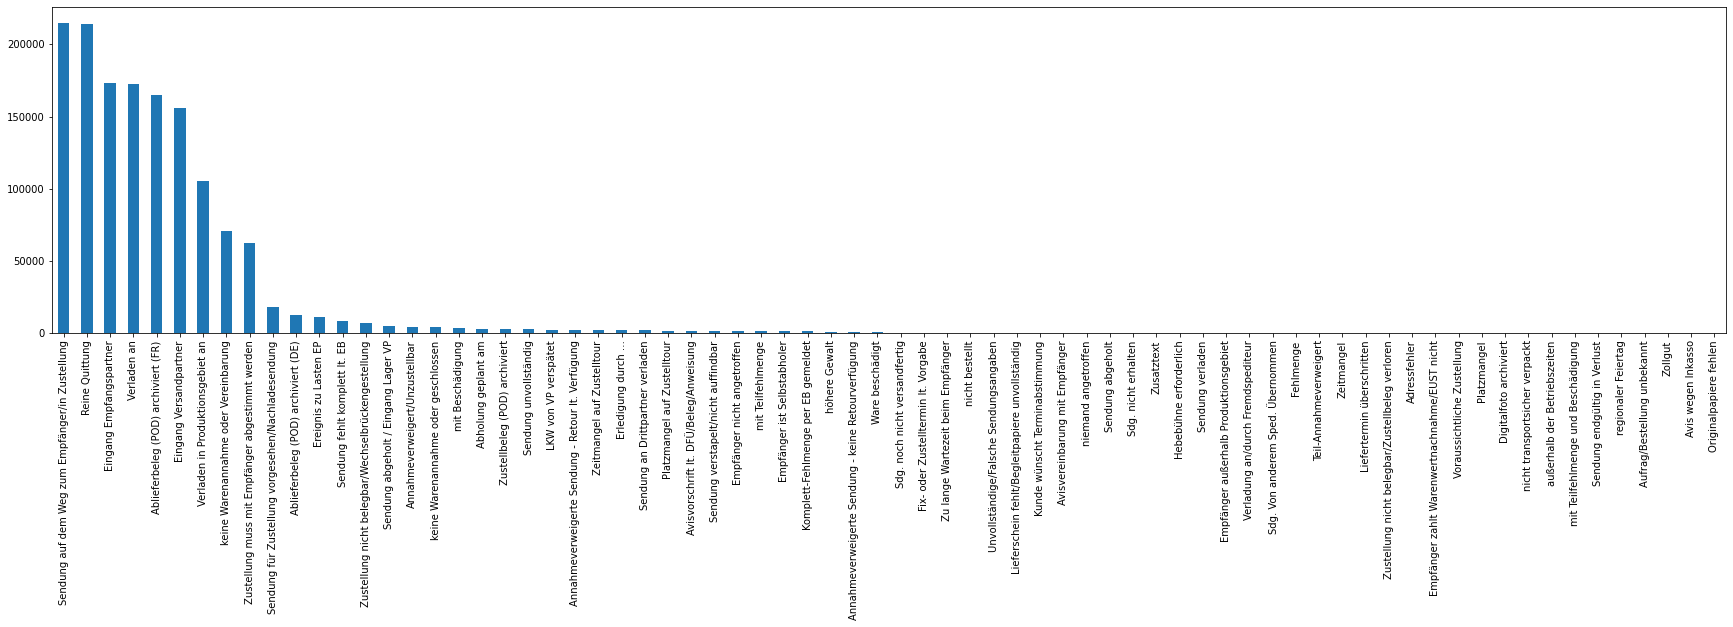

In [14]:
# Visualize frequency of events
import matplotlib.pyplot as plt
from matplotlib import colors

plt.figure(figsize=(30,6))
df_tracking_no_duplicate_sorted['reason_DE'].value_counts().plot(kind='bar')
plt.show()

### Events by Milestones

#### Number of events with corresponding Milestones: 1447887


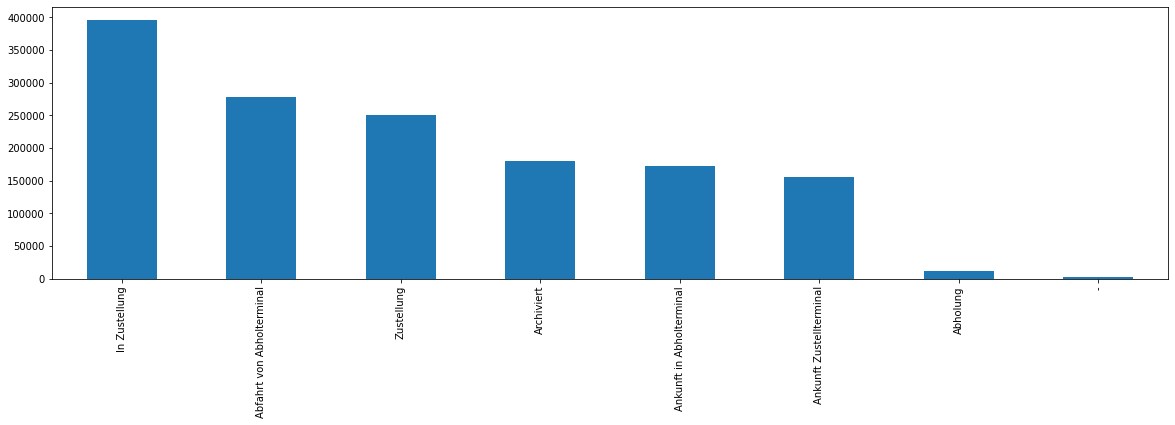


#### Counts of events
In Zustellung                396008
Abfahrt von Abholterminal    277815
Zustellung                   250294
Archiviert                   180236
Ankunft in Abholterminal     173299
Ankunft Zustellterminal      156107
Abholung                      11648
-                              2480
Name: MILESTONES, dtype: int64

#### Histogram of milestones


In [15]:
# Visualize frequency of milesstones
import matplotlib.pyplot as plt
from matplotlib import colors

plt.figure(figsize=(20,5))
df_tracking_no_duplicate_sorted['MILESTONES'].value_counts().plot(kind='bar')
print("#### Number of events with corresponding Milestones: {}".format(len(df_tracking_no_duplicate_sorted['MILESTONES'].index)))
plt.show()

print("\n#### Counts of events")
print(df_tracking_no_duplicate_sorted['MILESTONES'].value_counts())
print("\n#### Histogram of milestones")

### Events with No Milestones

#### Number of events with no corresponding Milestones: 2480

#### Counts of events
Avisvorschrift lt. DFÜ/Beleg/Anweisung    1513
Fix- oder Zustelltermin lt. Vorgabe        459
Avisvereinbarung mit Empfänger             325
Hebebühne erforderlich                     180
Zollgut                                      2
Avis wegen Inkasso                           1
Name: reason_DE, dtype: Int64

#### Histogram of events


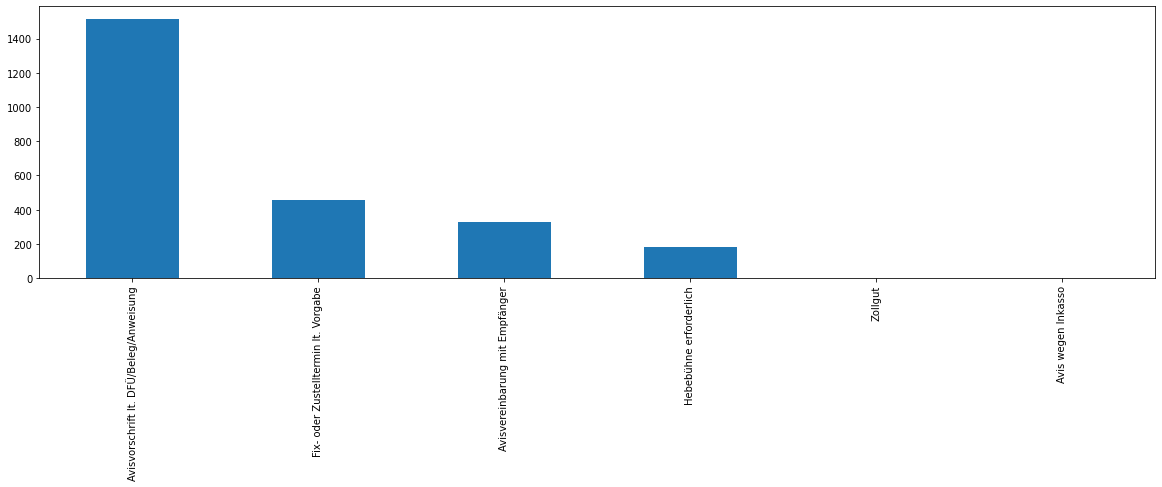

In [16]:
# Print statistic of events without milestones
import matplotlib.pyplot as plt
from matplotlib import colors

print("#### Number of events with no corresponding Milestones: {}".format(len(df_no_milestones.index)))
print("\n#### Counts of events")
print(df_no_milestones['reason_DE'].value_counts())
print("\n#### Histogram of events")
plt.figure(figsize=(20,5))
df_no_milestones['reason_DE'].value_counts().plot(kind='bar')
plt.show()


### Visualize 100 Random Shipments

In [21]:
!pip install seaborn

     |████████████████████████████████| 285 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 32.1 MB 2.7 MB/s eta 0:00:01


In [17]:
# Pprepare the data for the plot
random_shipments_100 = np.random.choice(df_unique_shipment_with_valid_milestones, size=100, replace=False)
df_tracking_random_shipments_100 = df_valid_milestones[df_valid_milestones['SHIPMENTID'].isin(random_shipments_100)].sort_values(by=['REIHENFOLGE'])

df_tracking_random_shipments_100_agg_by_reason = df_tracking_random_shipments_100.groupby(['SHIPMENTID', 'reason_DE'], sort=False).agg('count').reset_index().sort_values(by=['reason_DE'])
df_tracking_random_shipments_100_agg_by_milestones = df_tracking_random_shipments_100.groupby(['SHIPMENTID', 'MILESTONES'], sort=False).agg('count').reset_index().sort_values(by=['REIHENFOLGE'])

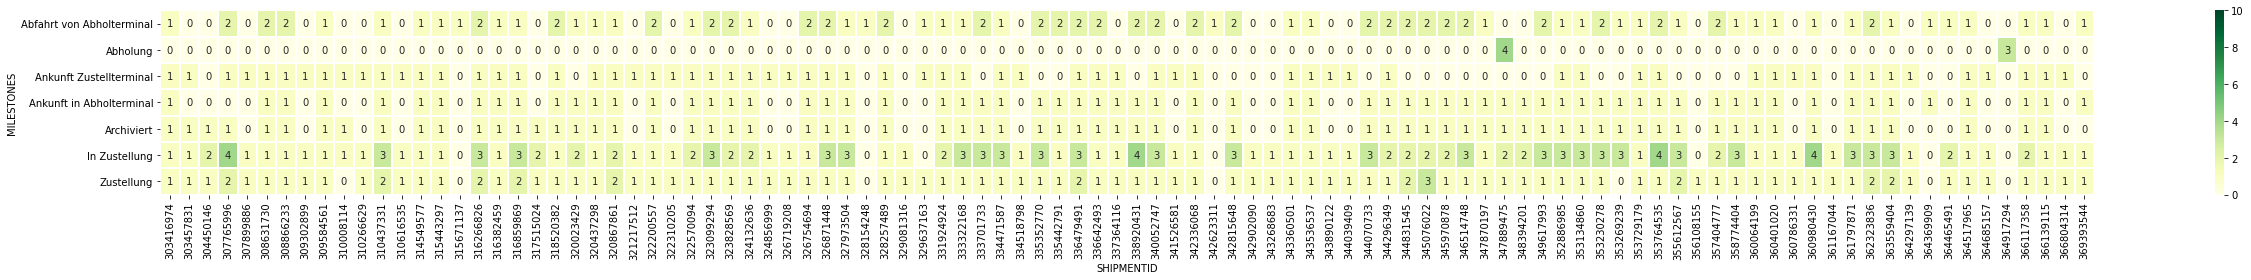

In [22]:
plt.figure(figsize=(36,4))
import seaborn as sns

_to_plot = pd.pivot_table(df_tracking_random_shipments_100_agg_by_milestones, values='reason_DE',  index=['MILESTONES'], columns='SHIPMENTID',fill_value=0)
# print(_to_plot)
ax = sns.heatmap(_to_plot, linewidths=0.1, cmap='YlGn', vmin=-0.0, vmax=10.0, annot=True) # annot=True
plt.tight_layout()
plt.show()

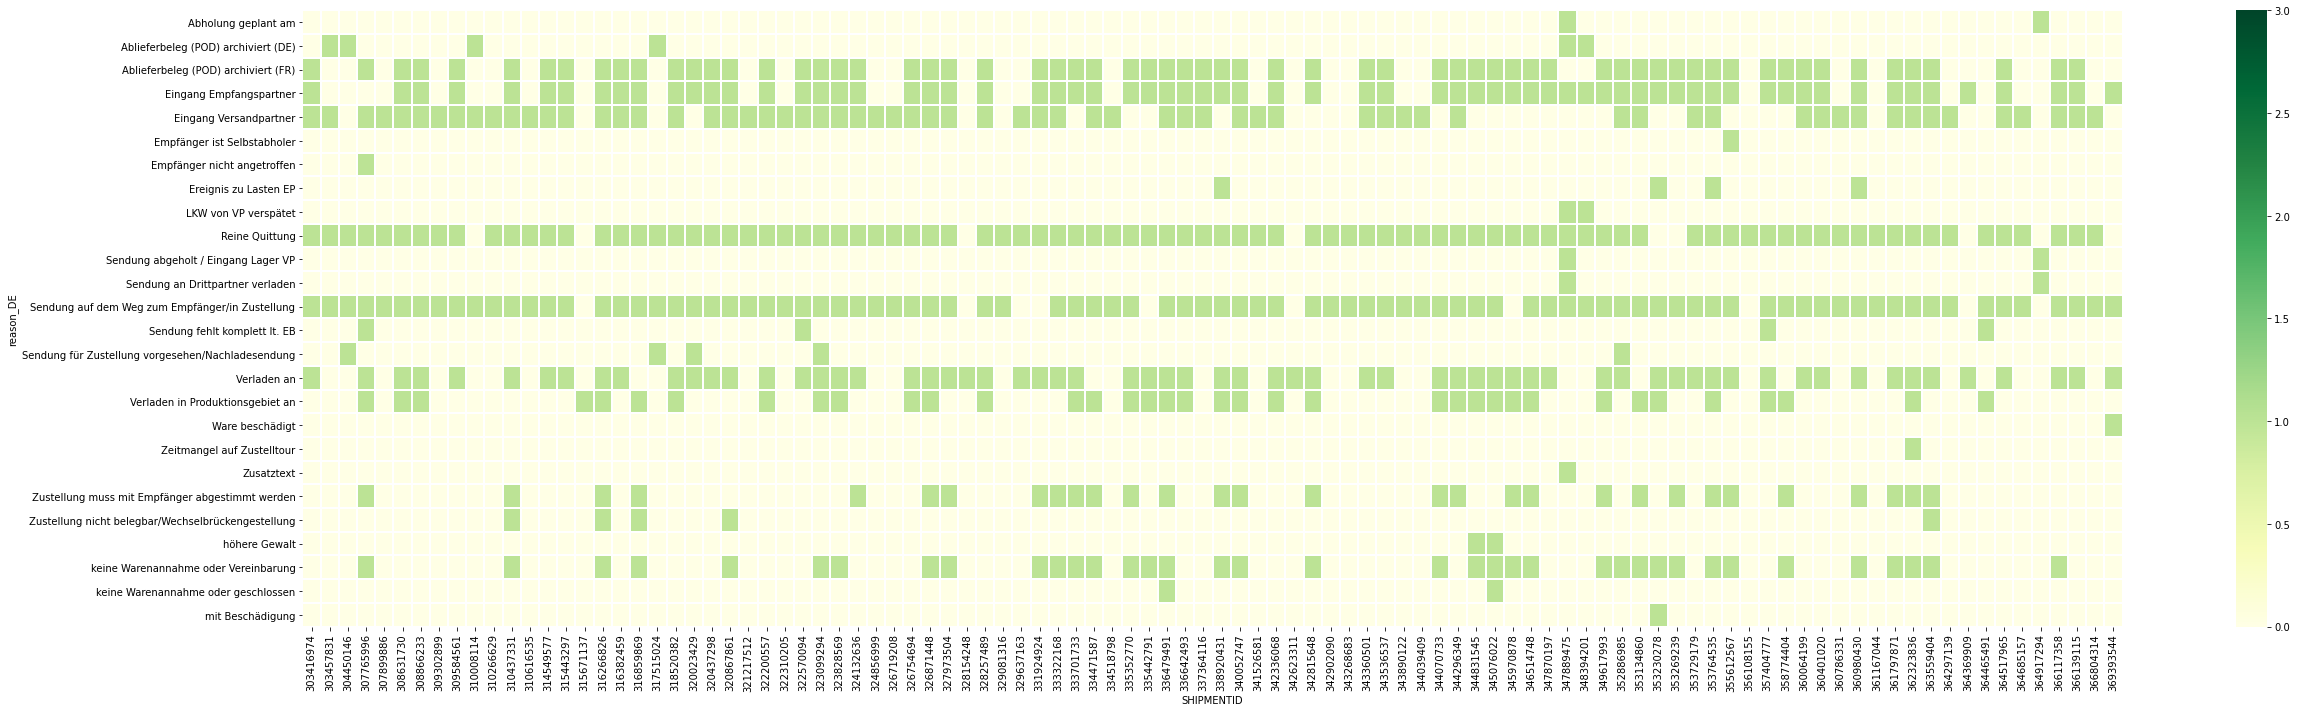

In [23]:
plt.figure(figsize=(36,10))
_to_plot = pd.pivot_table(df_tracking_random_shipments_100_agg_by_reason, values='MILESTONES',  index=['reason_DE'], columns='SHIPMENTID',fill_value=0)
# print(_to_plot)
ax = sns.heatmap(_to_plot, linewidths=0.1, cmap='YlGn', vmin=-0.0, vmax=3.0) # annot=True
plt.tight_layout()
plt.show()

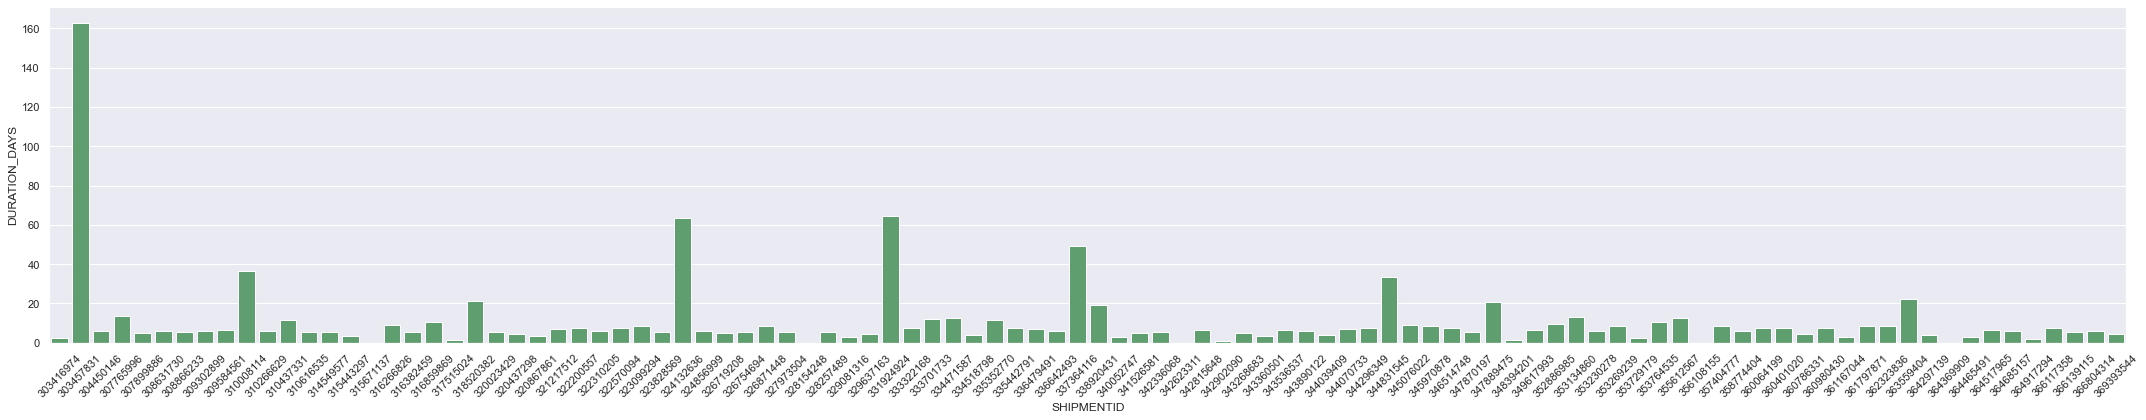

In [24]:
# distribution of all 
import seaborn as sns
sns.set_theme()
sns.color_palette("viridis", as_cmap=True)

plt.figure(figsize=(30,6))

new_df_tracking_random_shipments_100 = SHIPMENT_DURATION_BY_EVENTS[SHIPMENT_DURATION_BY_EVENTS['SHIPMENTID'].isin(random_shipments_100)].sort_values(by=['SHIPMENTID'])
new_df_tracking_random_shipments_100['DURATION_DAYS'] = new_df_tracking_random_shipments_100['DURATION'].dt.total_seconds()/(3600 * 24)
ax0 = sns.barplot(x='SHIPMENTID', y="DURATION_DAYS", data=new_df_tracking_random_shipments_100, color="g")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


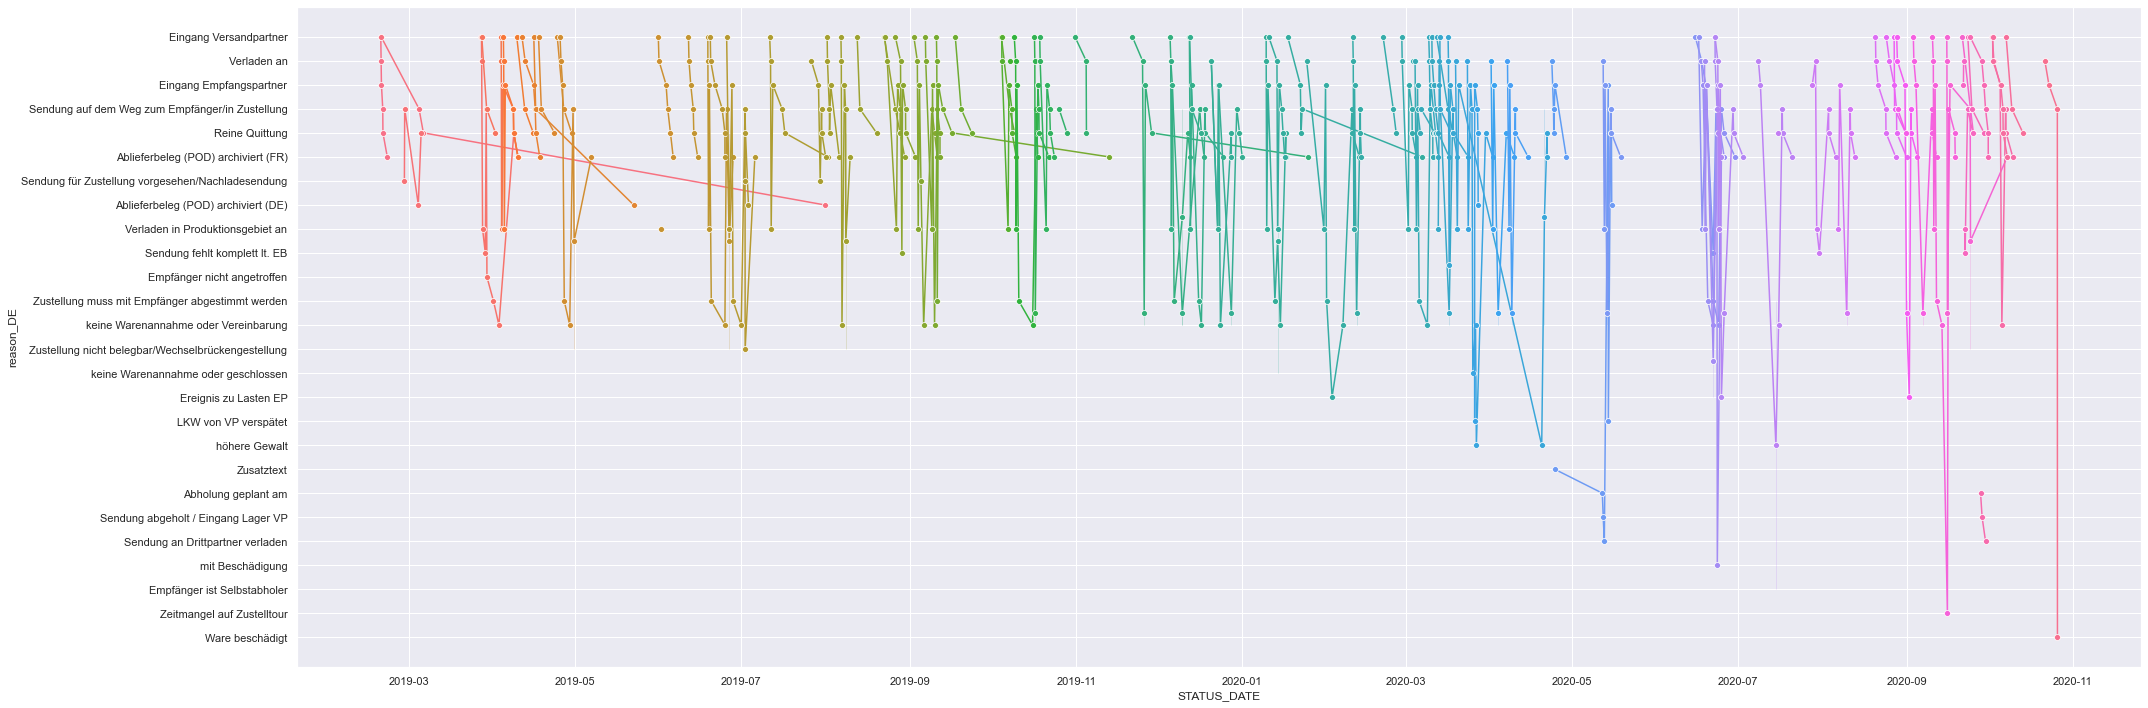

In [25]:
# distribution of all 
import seaborn as sns

plt.figure(figsize=(30,10))
ax1 = sns.lineplot(data=df_tracking_random_shipments_100.sort_values(by=['STATUS_DATE', 'REIHENFOLGE', 'reason_DE']), x="STATUS_DATE", y="reason_DE",hue="SHIPMENTID", marker="o", sort=False, legend=False )

plt.tight_layout()
plt.show()

# Export

In [32]:
# Export Data
# Dataframe to export
df_tracking_no_duplicate_sorted.to_json(
"../../Data/results/tracking_status_processed_28_01_2021_{}_{}.json".format(0, 200000), orient='records')